# Финансовый отчёт
## Цель:
проанализировать и обработать данные о продажах, разбить выручку по месяцам. Привести в пример несколько команд, с помощью которых можно будет достать данные по дате (например за 1 месяц).
Также настроить вывод данных по одному пользователю.

## План работ:
- Загрузить данные (15 минут)
- Проанализировать выборку (каждый столбец 3-5 минут 3*8=24 до 40 минут)
- Сделать план работ (1 час)  *(вышло на 40 минут)*
- Сделать паранрафы блокнота (20 минут) *(вышло на 10 минут)*
- Первичная предобратка столбцов (каждый столбец 10 минут 10*8=1 час 20 минут) *(вышло на 25 минут)*
  - Проверить есть ли пропуски *(вышло на 16 минут)*
    - если есть, в зависимости от столбца решить что с ними делать
      - удалить \ установить среднее или медианное знач. \ заменить NaN на отдельно значение
  - Переделать дату в формат datetime (5 минут) *(вышло на 9 минут)*
  - Создать новый столбец `revenue` (5 минут) *(вышло на 5 минут)
- Сделать новую таблицу с датами за все месяцы что продавались товары в бд. (30 минут)
- Просумировать сумму потраченную каждым клиентом, в каждом месяце
- Смерджить 2 таблицы (20 минут)
- - основную и новую, по дате, чтобы у каждого пользователя был отмечен каждый мессяц после регистрации вне зависимости от покупок
- Построить график выручки по месяцам



# Импорт библиотек и данных

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
# Google drive
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/E_Commerce Data.csv', encoding='unicode_escape')
# local
df = pd.read_csv('./E_Commerce Data.csv', encoding='unicode_escape')

In [ ]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [ ]:
print(len(df['Country'].unique()))
print(len(df['Description'].unique()))

38
4224


# Первичная предобратка столбцов



## Проверить есть ли пропуски

In [ ]:
df.isna().mean()

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.002683
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,0.249267
Country,0.000000


In [ ]:
# первые и последние значения столбца
print(sorted(df['CustomerID'].unique())[:2])
print(sorted(df['CustomerID'].unique())[-2:])

[np.float64(12346.0), np.float64(12347.0)]
[np.float64(18283.0), np.float64(18287.0)]


In [ ]:
# Значение -1 для тех покупок у которых нет пользовательского идентификатора
df['CustomerID'] = df['CustomerID'].fillna(-1)

In [ ]:
df.isna().mean()

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.002683
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,0.000000
Country,0.000000


## Преобразование `InvoiceDate` в datetime формат

In [ ]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
df['datetime'] = pd.to_datetime(df['InvoiceDate'])
display(df.sample(4))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime
358220,568135,DOT,DOTCOM POSTAGE,1,9/23/2011 17:04,201.82,-1.0,United Kingdom,2011-09-23 17:04:00
173864,551724,21175,GIN + TONIC DIET METAL SIGN,1,5/3/2011 17:12,2.55,15976.0,United Kingdom,2011-05-03 17:12:00
515341,579777,21257,VICTORIAN SEWING BOX MEDIUM,1,11/30/2011 15:13,15.79,-1.0,United Kingdom,2011-11-30 15:13:00
35012,539434,22322,BIRD DECORATION GREEN POLKADOT,1,12/17/2010 14:41,1.66,-1.0,United Kingdom,2010-12-17 14:41:00


In [ ]:
print(len(df))
print(len(df['CustomerID'].unique()))

541909
4373


## Создать новый столбец revenue

In [ ]:
df['Revenue'] = df['UnitPrice'] * df['Quantity']
df.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,Revenue
398437,571241,84988,SET OF 72 PINK HEART PAPER DOILIES,1,10/14/2011 14:58,1.45,14592.0,United Kingdom,2011-10-14 14:58:00,1.45
303488,563547,C2,CARRIAGE,1,8/17/2011 12:29,50.00,-1.0,EIRE,2011-08-17 12:29:00,50.00
224503,C556530,22501,PICNIC BASKET WICKER LARGE,-3,6/13/2011 11:42,9.95,18109.0,United Kingdom,2011-06-13 11:42:00,-29.85


<Axes: >

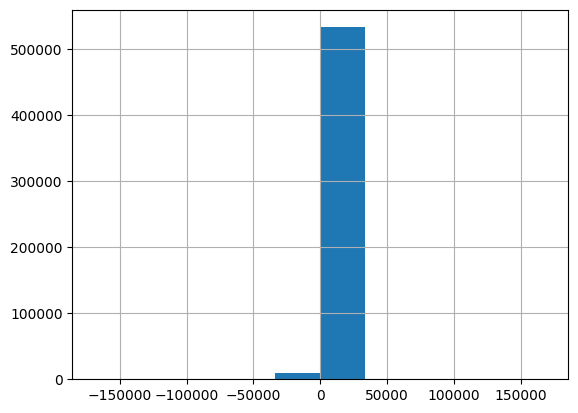

In [ ]:
# Распределение выручки поскольку есть и отрицательные значения, значит можно считать что были возвраты
df['Revenue'].hist()

# Сделать новую таблицу с датами за все месяцы что продавались товары в бд.

In [ ]:
print(df['datetime'].min())
print(df['datetime'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [ ]:
month = pd.DataFrame(pd.date_range('2010-12-01', '2011-12-09', freq='MS'))
month.columns = ['month']
month

,month
0,2010-12-01
1,2011-01-01
2,2011-02-01
3,2011-03-01
4,2011-04-01
5,2011-05-01
6,2011-06-01
7,2011-07-01
8,2011-08-01
9,2011-09-01


# Просумировать сумму потраченную каждым клиентом, в каждом месяце

Замена каждого числа на 1, чтобы в дальнейшем группировать по месяцам а не по дням

In [ ]:
df['month'] = df['datetime'].values.astype('datetime64[M]')
df[['month', 'datetime']].head(2)

,month,datetime
370599,2011-09-01,2011-09-30 15:04:00
4673,2010-12-01,2010-12-02 15:46:00


Выручка за каждый месяц

In [ ]:
df.groupby('month')['Revenue'].sum()

,Revenue
month,
2010-12-01,748957.020
2011-01-01,560000.260
2011-02-01,498062.650
2011-03-01,683267.080
2011-04-01,493207.121
2011-05-01,723333.510
2011-06-01,691123.120
2011-07-01,681300.111
2011-08-01,682680.510


Таблица с выручками с каждого клиента по месяцам

In [ ]:
t = df.groupby(['month', 'CustomerID'])['Revenue'].sum().reset_index()

In [ ]:
t.head()

,month,CustomerID,Revenue
0,2010-12-01,-1.0,194353.00
1,2010-12-01,12347.0,711.79
2,2010-12-01,12348.0,892.80
3,2010-12-01,12370.0,1868.02
4,2010-12-01,12377.0,1001.52


In [ ]:
t[t['CustomerID'] == 12347.0]

,month,CustomerID,Revenue
1,2010-12-01,12347.0,711.79
951,2011-01-01,12347.0,475.39
3554,2011-04-01,12347.0,636.25
5534,2011-06-01,12347.0,382.52
7580,2011-08-01,12347.0,584.91
9864,2011-10-01,12347.0,1294.32
13002,2011-12-01,12347.0,224.82


# Смерджить 2 таблицы

Создать таблицу с датами регистрации пользователей

In [ ]:
user = df.groupby('CustomerID')['month'].min().reset_index()
display(user.head())
display(user[user['CustomerID'] == 12346.0])

,CustomerID,month
0,-1.0,2010-12-01
1,12346.0,2011-01-01
2,12347.0,2010-12-01
3,12348.0,2010-12-01
4,12349.0,2011-11-01


,CustomerID,month
1,12346.0,2011-01-01


In [ ]:
user.columns = ['CustomerID', 'reg_month']

In [ ]:
user.head()

,CustomerID,reg_month
0,-1.0,2010-12-01
1,12346.0,2011-01-01
2,12347.0,2010-12-01
3,12348.0,2010-12-01
4,12349.0,2011-11-01


Требуется чтобы у каждого пользователя была строчка с каждым месяцем

In [ ]:
month['key'] = 1

In [ ]:
user['key'] = 1

In [ ]:
display(month.head(3))
display(user.head(3))

,month,key
0,2010-12-01,1
1,2011-01-01,1
2,2011-02-01,1


,CustomerID,reg_month,key
0,-1.0,2010-12-01,1
1,12346.0,2011-01-01,1
2,12347.0,2010-12-01,1


Объединение таблиц с месяцами и пользователями

In [ ]:
res = month.merge(user, on='key')

In [ ]:
res.head(3)

,month,key,CustomerID,reg_month
0,2010-12-01,1,-1.0,2010-12-01
1,2010-12-01,1,12346.0,2011-01-01
2,2010-12-01,1,12347.0,2010-12-01


In [ ]:
res.drop('key', axis=1, inplace=True)

In [ ]:
res.sample(3)

,month,CustomerID,reg_month
9844,2011-02-01,13817.0,2010-12-01
37863,2011-08-01,16233.0,2010-12-01
4314,2010-12-01,18211.0,2011-03-01


In [ ]:
res[res['CustomerID'] == 16341.0]

,month,CustomerID,reg_month
2951,2010-12-01,16341.0,2011-05-01
7324,2011-01-01,16341.0,2011-05-01
11697,2011-02-01,16341.0,2011-05-01
16070,2011-03-01,16341.0,2011-05-01
20443,2011-04-01,16341.0,2011-05-01
24816,2011-05-01,16341.0,2011-05-01
29189,2011-06-01,16341.0,2011-05-01
33562,2011-07-01,16341.0,2011-05-01
37935,2011-08-01,16341.0,2011-05-01
42308,2011-09-01,16341.0,2011-05-01


Убрать лишние строки (где месяц в отчёте случился раньше регистрации клиента)

In [ ]:
res = res[res['month'] >= res['reg_month']]

In [ ]:
res[res['CustomerID'] == 16341.0]

,month,CustomerID,reg_month
24816,2011-05-01,16341.0,2011-05-01
29189,2011-06-01,16341.0,2011-05-01
33562,2011-07-01,16341.0,2011-05-01
37935,2011-08-01,16341.0,2011-05-01
42308,2011-09-01,16341.0,2011-05-01
46681,2011-10-01,16341.0,2011-05-01
51054,2011-11-01,16341.0,2011-05-01
55427,2011-12-01,16341.0,2011-05-01


Выделяем только нужные данные для отчёта `Revenue` для аналитики и `CustomerID`, `month:` для мерджа таблиц

In [ ]:
rev_mon_C = df.groupby(['CustomerID', 'month'])['Revenue'].sum().reset_index()
rev_mon_C[rev_mon_C['CustomerID'] == 16341.0]

,CustomerID,month,Revenue
9298,16341.0,2011-05-01,792.21
9299,16341.0,2011-09-01,727.19
9300,16341.0,2011-11-01,439.98


In [ ]:
res = res.merge(rev_mon_C, how='left', on=['CustomerID', 'month'])

In [ ]:
res[res['CustomerID'] == 16341.0]

,month,CustomerID,reg_month,Revenue
10622,2011-05-01,16341.0,2011-05-01,792.21
13544,2011-06-01,16341.0,2011-05-01,NaN
16678,2011-07-01,16341.0,2011-05-01,NaN
19995,2011-08-01,16341.0,2011-05-01,NaN
23564,2011-09-01,16341.0,2011-05-01,727.19
27460,2011-10-01,16341.0,2011-05-01,NaN
31666,2011-11-01,16341.0,2011-05-01,439.98
36027,2011-12-01,16341.0,2011-05-01,NaN


Можно также объединить с помощью `join`:

```py
res.set_index(['month','CustomerID']).join(rev_mon_C.set_index(['month','CustomerID']))
```

# Построить график выручки по месяцам

Также требуется узнать среднее значение выручки на каждого активного клиента в этом месяце

In [ ]:
res['user'] = 1

In [ ]:
res.head()

,month,CustomerID,reg_month,Revenue,user
0,2010-12-01,-1.0,2010-12-01,194353.00,1
1,2010-12-01,12347.0,2010-12-01,711.79,1
2,2010-12-01,12348.0,2010-12-01,892.80,1
3,2010-12-01,12370.0,2010-12-01,1868.02,1
4,2010-12-01,12377.0,2010-12-01,1001.52,1


In [ ]:
res['active'] = ~res['Revenue'].isna()*1

In [ ]:
res.head()

,month,CustomerID,reg_month,Revenue,user,active
0,2010-12-01,-1.0,2010-12-01,194353.00,1,1
1,2010-12-01,12347.0,2010-12-01,711.79,1,1
2,2010-12-01,12348.0,2010-12-01,892.80,1,1
3,2010-12-01,12370.0,2010-12-01,1868.02,1,1
4,2010-12-01,12377.0,2010-12-01,1001.52,1,1


In [ ]:
res[res['CustomerID'] == 16341.0]

,month,CustomerID,reg_month,Revenue,user,active
10622,2011-05-01,16341.0,2011-05-01,792.21,1,1
13544,2011-06-01,16341.0,2011-05-01,NaN,1,0
16678,2011-07-01,16341.0,2011-05-01,NaN,1,0
19995,2011-08-01,16341.0,2011-05-01,NaN,1,0
23564,2011-09-01,16341.0,2011-05-01,727.19,1,1
27460,2011-10-01,16341.0,2011-05-01,NaN,1,0
31666,2011-11-01,16341.0,2011-05-01,439.98,1,1
36027,2011-12-01,16341.0,2011-05-01,NaN,1,0


In [ ]:
res['new'] = (res['month'] == res['reg_month']) * 1

In [ ]:
t = res.groupby('month')[['user', 'active', 'new', 'Revenue']].sum()

In [ ]:
t['active_users_revenue_avg'] = t['Revenue'] / t['active']

In [ ]:
t

,user,active,new,Revenue,active_users_revenue_avg
month,,,,,
2010-12-01,949,949,949,748957.020,789.206554
2011-01-01,1370,784,421,560000.260,714.286046
2011-02-01,1750,799,380,498062.650,623.357509
2011-03-01,2190,1021,440,683267.080,669.213595
2011-04-01,2489,900,299,493207.121,548.007912
2011-05-01,2768,1080,279,723333.510,669.753250
2011-06-01,3003,1052,235,691123.120,656.961141
2011-07-01,3194,994,191,681300.111,685.412587
2011-08-01,3361,981,167,682680.510,695.902661


<Axes: xlabel='month'>

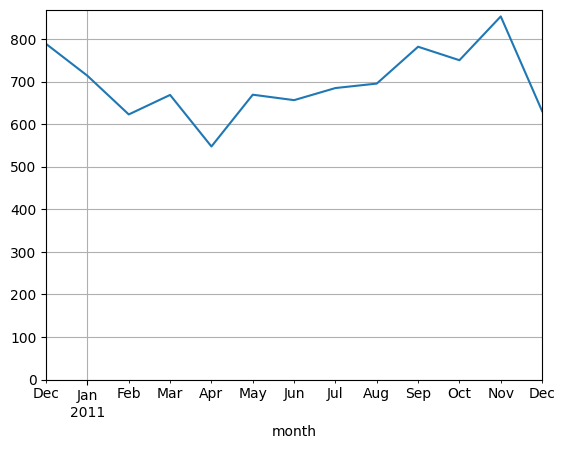

In [ ]:
t['active_users_revenue_avg'].plot(grid=True, ylim=0)

In [ ]:
res['Revenue'].sum()

np.float64(9747747.934)